In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [45]:
train_data=pd.read_csv('bigdatamart_Train.csv')
test_data=pd.read_csv('bigdatamart_Test.csv')

In [46]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [47]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [48]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [50]:
df=pd.DataFrame(data=train_data)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [51]:
df.shape

(8523, 12)

In [52]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [53]:
df.dropna(axis=0,how='any',inplace=True)

In [54]:
df.shape

(4650, 12)

In [55]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

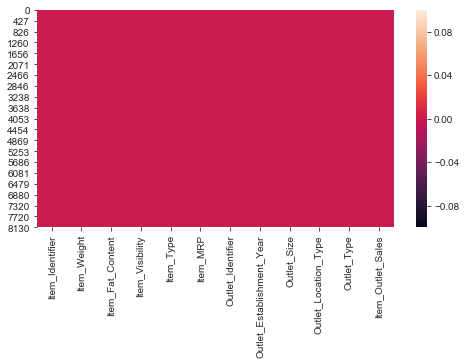

In [56]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull())

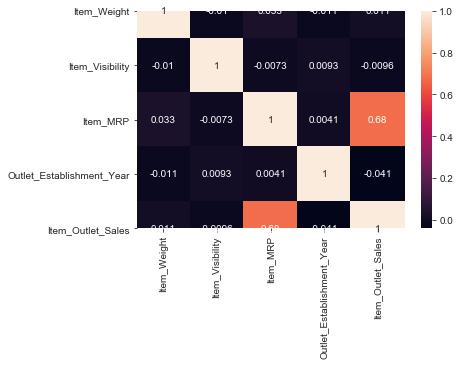

In [57]:
dfcorr=df.corr()
sns.heatmap(dfcorr,annot=True)

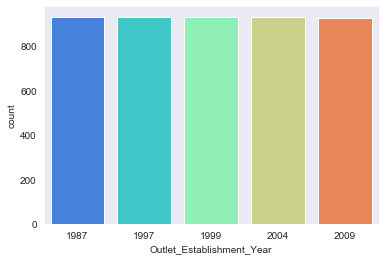

In [58]:
sns.set_style('dark')
sns.countplot(x='Outlet_Establishment_Year',data=df,palette='rainbow')

In [59]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [60]:
len(df['Item_Type'].unique())

16

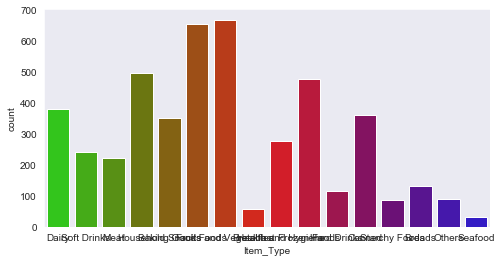

In [61]:
plt.figure(figsize=(8,4))
sns.countplot(x='Item_Type',data=df,palette='brg_r')

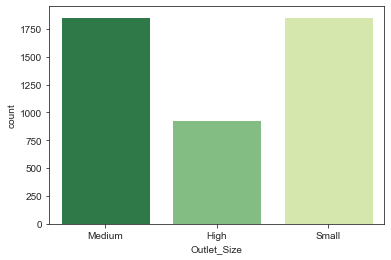

In [62]:
sns.set_style('ticks')
sns.countplot(x='Outlet_Size',data=df,palette='YlGn_r')

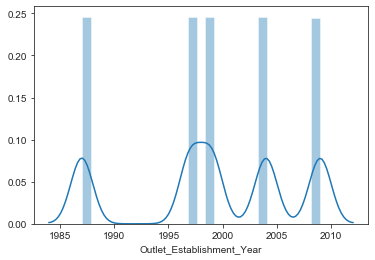

In [63]:
sns.distplot(df['Outlet_Establishment_Year'])

In [64]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [65]:
df=pd.DataFrame(data=df,dtype='object')

In [66]:
#convert_dis={'Item_Identifier':str}
#df=df.infer_objects()

In [67]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [68]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.0160473,Dairy,249.809,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.0192782,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423
2,FDN15,17.5,Low Fat,0.0167601,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
4,NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705
5,FDP36,10.395,Regular,0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.609
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.75,reg,0.0836066,Frozen Foods,178.832,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.64
8518,FDF22,6.865,Low Fat,0.0567834,Snack Foods,214.522,OUT013,1987,High,Tier 3,Supermarket Type1,2778.38
8520,NCJ29,10.6,Low Fat,0.0351863,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.11
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.133,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.6


In [69]:
len(df['Item_Type'].unique())

16

In [70]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'reg', 'LF'], dtype=object)

In [71]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [72]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [73]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2'], dtype=object)

In [74]:
pd.get_dummies(df['Outlet_Size'],drop_first=True).head()

,Medium,Small
0,1,0
1,1,0
2,1,0
4,0,0
5,1,0


In [75]:
iterm_fat_con=pd.get_dummies(df['Item_Fat_Content'],drop_first=True,prefix='Item_Fat_Content')
outlet_size=pd.get_dummies(df['Outlet_Size'],drop_first=True,prefix='Outlet_Size')
location_type=pd.get_dummies(df['Outlet_Location_Type'],drop_first=True,prefix='Outlet_Location_Type')
outlet_type=pd.get_dummies(df['Outlet_Type'],drop_first=True,prefix='Outlet_Type')

In [76]:
df.drop(['Item_Identifier','Outlet_Identifier','Item_Type','Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1,inplace=True)

In [77]:
for i in [iterm_fat_con,outlet_size,location_type,outlet_type]:
    df=pd.concat([df,i],axis=1)

In [78]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type2
0,9.3,0.0160473,249.809,1999,3735.14,1,0,0,0,1,0,0,0,0
1,5.92,0.0192782,48.2692,2009,443.423,0,1,0,0,1,0,0,1,1
2,17.5,0.0167601,141.618,1999,2097.27,1,0,0,0,1,0,0,0,0
4,8.93,0,53.8614,1987,994.705,1,0,0,0,0,0,0,1,0
5,10.395,0,51.4008,2009,556.609,0,1,0,0,1,0,0,1,1


In [79]:
x=df.drop('Item_Outlet_Sales',axis=1).head()
x

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type2
0,9.3,0.0160473,249.809,1999,1,0,0,0,1,0,0,0,0
1,5.92,0.0192782,48.2692,2009,0,1,0,0,1,0,0,1,1
2,17.5,0.0167601,141.618,1999,1,0,0,0,1,0,0,0,0
4,8.93,0,53.8614,1987,1,0,0,0,0,0,0,1,0
5,10.395,0,51.4008,2009,0,1,0,0,1,0,0,1,1


In [80]:
y=df['Item_Outlet_Sales'].head()
y

0    3735.14
1    443.423
2    2097.27
4    994.705
5    556.609
Name: Item_Outlet_Sales, dtype: object

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [82]:
ln=LinearRegression()

In [91]:
ln.fit(x_train,y_train)
preln=ln.predict(x_test)

In [92]:
print('Predicted Value of these Dataset in this Model:',preln)

Predicted Value of these Dataset in this Model: [795.89881506 798.40557882]


In [97]:
print(mean_squared_error(y_test,preln))
print(mean_absolute_error(y_test,preln))

91352.51172044083
297.136396940262


In [101]:
from sklearn.externals import joblib

In [102]:
joblib.dump(ln,'Bigmartfile.obj')

['Bigmartfile.obj']